#Importing the necessary libraries I will use for this project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Reading in the data

In [ ]:
df = pd.read_csv('/content/data/Learning_outcome.csv')

Looking at the data

In [ ]:
df.head()

,Entity,Code,Year,Harmonized Test Scores,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),World Region according to the World Bank
0,Afghanistan,AFG,2017,355.0000,2096.0930,35643420.0,South Asia
1,Afghanistan,AFG,2018,354.7588,2060.6990,36686788.0,NaN
2,Afghanistan,AFG,2020,354.7588,1968.3410,38972236.0,NaN
3,Afghanistan,AFG,2002,NaN,1280.4631,21000258.0,NaN
4,Afghanistan,AFG,2003,NaN,1292.3335,22645136.0,NaN


#Data Cleaning!

Checking for missing data

In [ ]:
# checking missing in each colume
df.isna().sum()


Entity                                                     0
Code                                                    3538
Year                                                       0
Harmonized Test Scores                                 57905
GDP per capita, PPP (constant 2017 international $)    52164
Population (historical estimates)                        258
World Region according to the World Bank               58293
dtype: int64

Drop Na

In [ ]:
drop_df = df.dropna()
drop_df

,Entity,Code,Year,Harmonized Test Scores,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),World Region according to the World Bank
0,Afghanistan,AFG,2017,355.0,2096.0930,35643420.0,South Asia
594,Albania,ALB,2017,429.0,12773.2690,2879361.0,Europe and Central Asia
853,Algeria,DZA,2017,374.0,11809.4830,41136548.0,Middle East and North Africa
1484,Angola,AGO,2017,326.0,7216.0615,30208634.0,Sub-Saharan Africa
2127,Argentina,ARG,2017,424.0,23597.1170,44054616.0,Latin America and Caribbean
...,...,...,...,...,...,...,...
55667,Uruguay,URY,2017,444.0,23106.9980,3422205.0,Latin America and Caribbean
56184,Vanuatu,VUT,2017,356.0,3031.1907,290250.0,East Asia and Pacific
56894,Vietnam,VNM,2017,519.0,9050.6880,94033048.0,East Asia and Pacific
57993,Zambia,ZMB,2017,358.0,3395.4797,17298056.0,Sub-Saharan Africa


# Checking the data type of the columns

In [ ]:
print(drop_df.dtypes)


Entity                                                  object
Code                                                    object
Year                                                     int64
Harmonized Test Scores                                 float64
GDP per capita, PPP (constant 2017 international $)    float64
Population (historical estimates)                      float64
World Region according to the World Bank                object
dtype: object


Rename column

In [ ]:
rev_df_name = drop_df.rename(columns={'Entity':'entity','Code':'code','Year':'year','Harmonized Test Scores': 'test_scores', 'GDP per capita, PPP (constant 2017 international $)': 'gdp_per_capita',
                                      'Population (historical estimates)': 'pop_his_estimates','World Region according to the World Bank' : 'region_World_Bank'})
rev_df_name

,entity,code,year,test_scores,gdp_per_capita,pop_his_estimates,region_World_Bank
0,Afghanistan,AFG,2017,355.0,2096.0930,35643420.0,South Asia
594,Albania,ALB,2017,429.0,12773.2690,2879361.0,Europe and Central Asia
853,Algeria,DZA,2017,374.0,11809.4830,41136548.0,Middle East and North Africa
1484,Angola,AGO,2017,326.0,7216.0615,30208634.0,Sub-Saharan Africa
2127,Argentina,ARG,2017,424.0,23597.1170,44054616.0,Latin America and Caribbean
...,...,...,...,...,...,...,...
55667,Uruguay,URY,2017,444.0,23106.9980,3422205.0,Latin America and Caribbean
56184,Vanuatu,VUT,2017,356.0,3031.1907,290250.0,East Asia and Pacific
56894,Vietnam,VNM,2017,519.0,9050.6880,94033048.0,East Asia and Pacific
57993,Zambia,ZMB,2017,358.0,3395.4797,17298056.0,Sub-Saharan Africa


#Checking for Outliers

Removing Outliers

<Axes: ylabel='test_scores'>

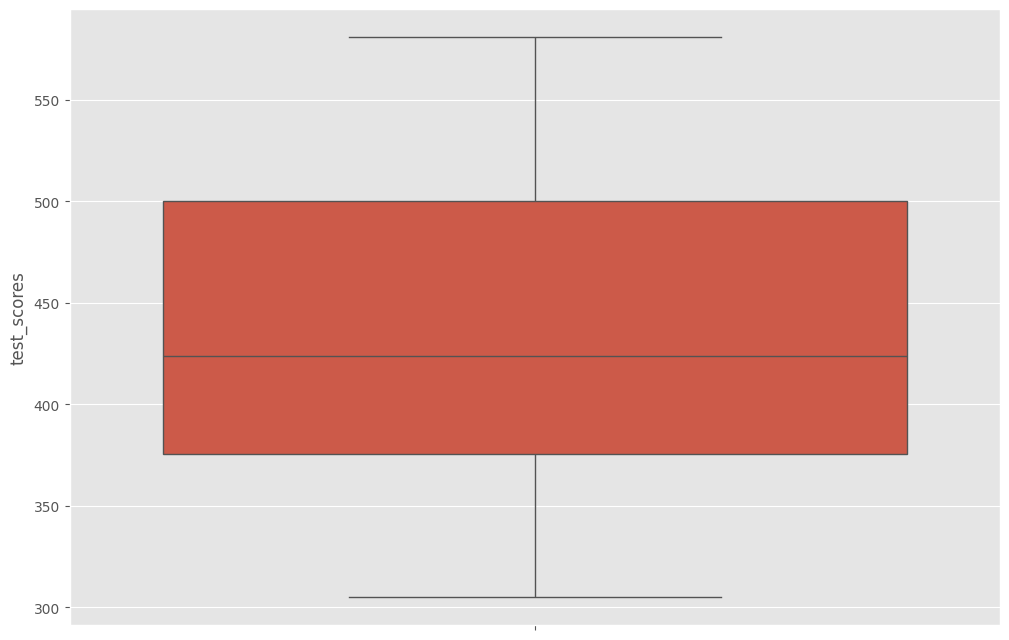

In [ ]:
sns.boxplot(rev_df_name['test_scores'])

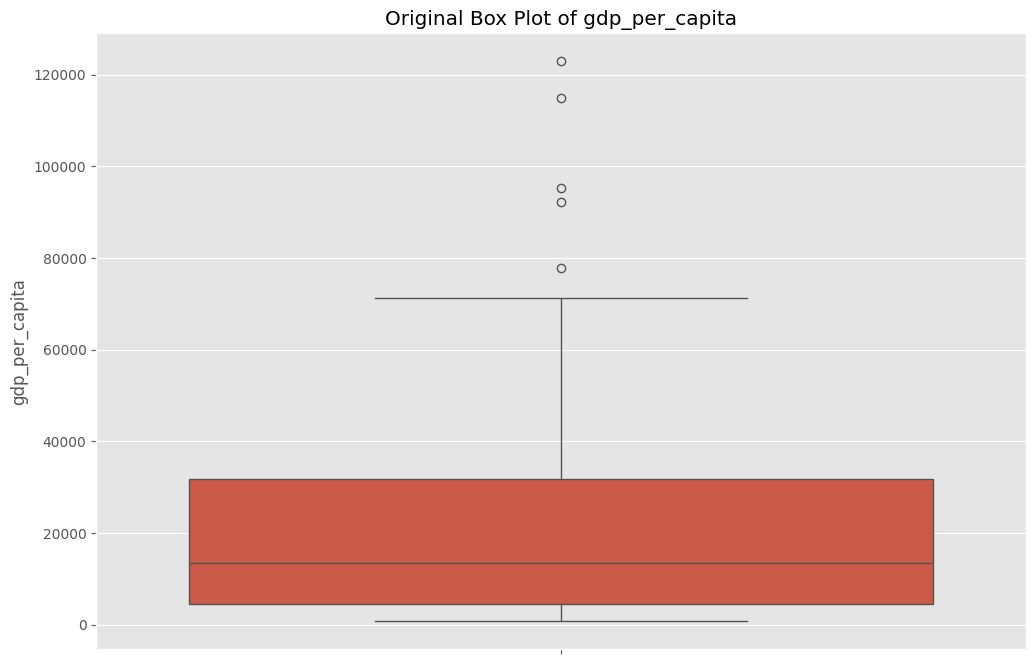

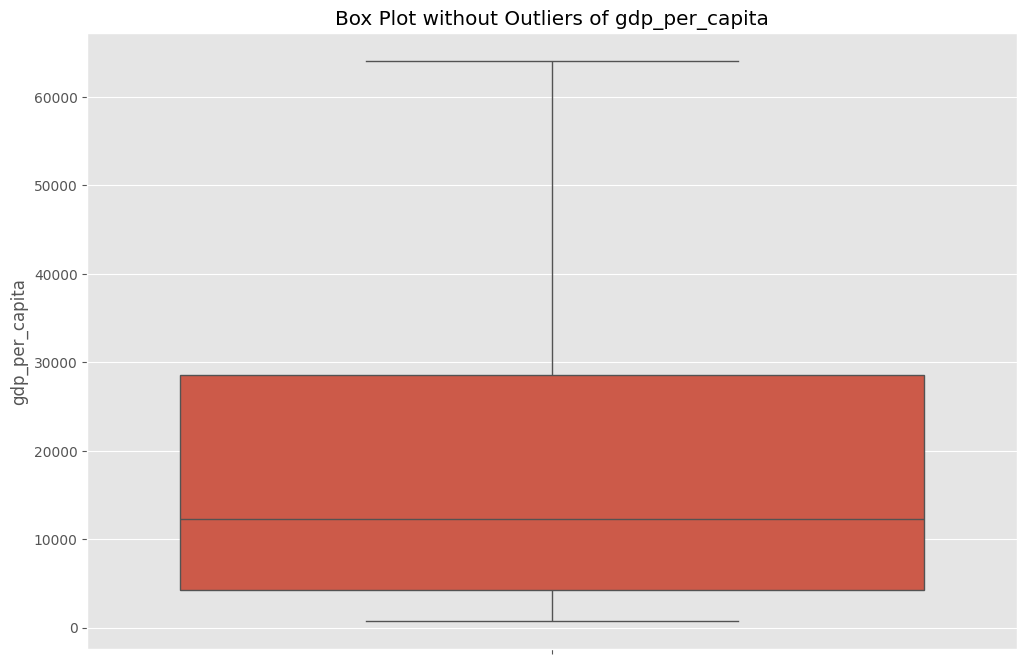

In [ ]:
def removal_box_plot(rev_df_name, gdp_per_capita, threshold):
    sns.boxplot(rev_df_name[gdp_per_capita])
    plt.title(f'Original Box Plot of {gdp_per_capita}')
    plt.show()

    removed_outliers = rev_df_name[rev_df_name[gdp_per_capita] <= threshold]

    sns.boxplot(removed_outliers[gdp_per_capita])
    plt.title(f'Box Plot without Outliers of {gdp_per_capita}')
    plt.show()
    return removed_outliers


threshold_value = 65000

df_clean_gdp = removal_box_plot(rev_df_name, 'gdp_per_capita', threshold_value)

In [ ]:
df_clean_gdp

,entity,code,year,test_scores,gdp_per_capita,pop_his_estimates,region_World_Bank
0,Afghanistan,AFG,2017,355.0,2096.0930,35643420.0,South Asia
594,Albania,ALB,2017,429.0,12773.2690,2879361.0,Europe and Central Asia
853,Algeria,DZA,2017,374.0,11809.4830,41136548.0,Middle East and North Africa
1484,Angola,AGO,2017,326.0,7216.0615,30208634.0,Sub-Saharan Africa
2127,Argentina,ARG,2017,424.0,23597.1170,44054616.0,Latin America and Caribbean
...,...,...,...,...,...,...,...
55667,Uruguay,URY,2017,444.0,23106.9980,3422205.0,Latin America and Caribbean
56184,Vanuatu,VUT,2017,356.0,3031.1907,290250.0,East Asia and Pacific
56894,Vietnam,VNM,2017,519.0,9050.6880,94033048.0,East Asia and Pacific
57993,Zambia,ZMB,2017,358.0,3395.4797,17298056.0,Sub-Saharan Africa


In [ ]:
Q1 = np.percentile(df_clean_gdp['pop_his_estimates'], 25, method='midpoint')
Q3 = np.percentile(df_clean_gdp['pop_his_estimates'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)
upper = Q3+1.5*IQR
upper_array = np.array(df_clean_gdp['pop_his_estimates'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())


33433092.5
Upper Bound: 87693218.75
15


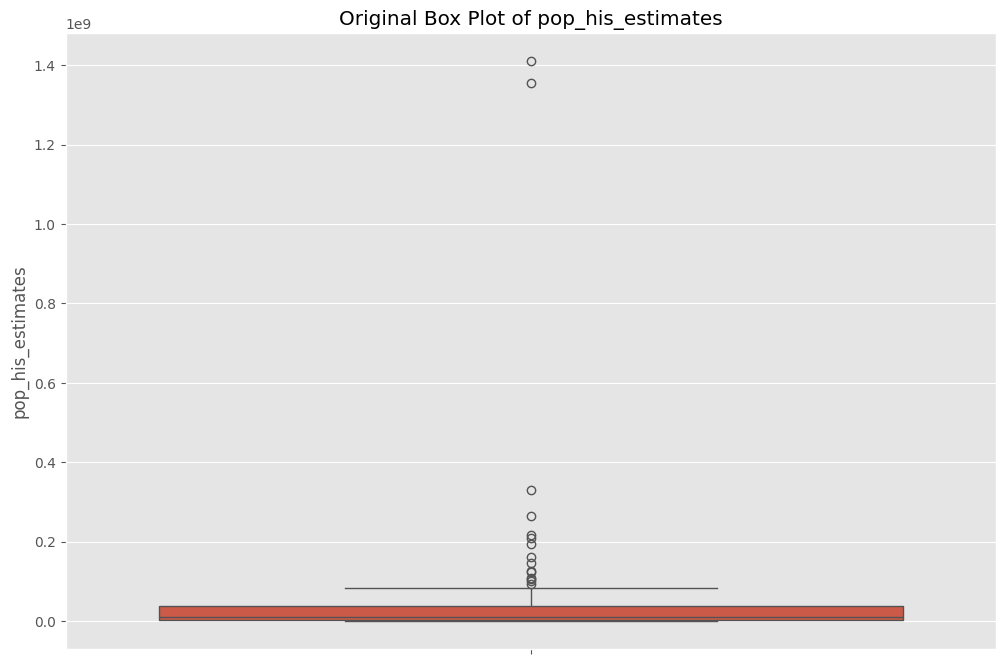

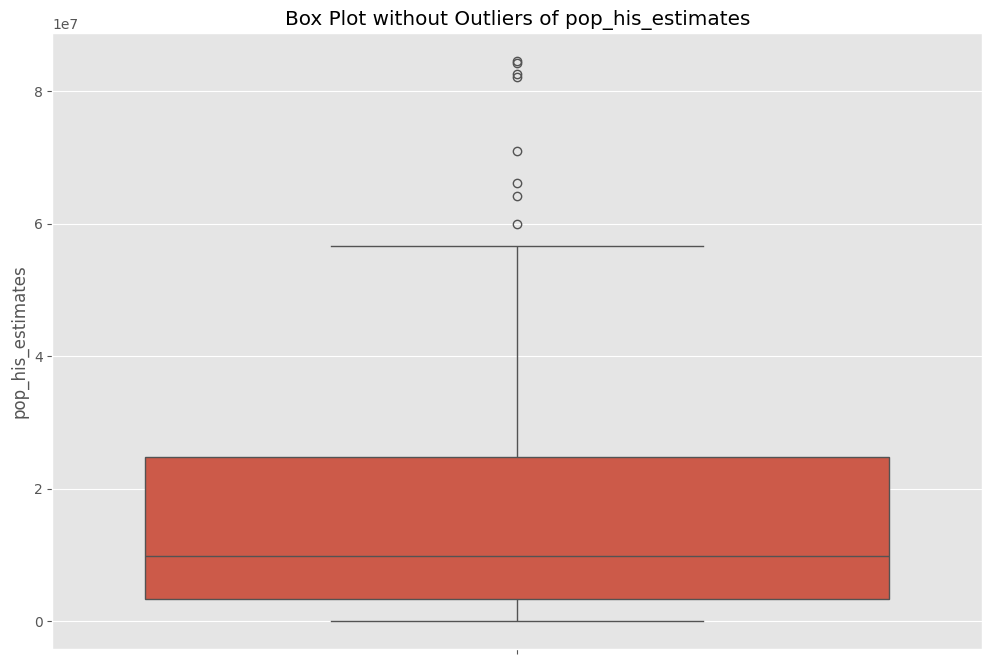

In [ ]:
def removal_box_plot(df_clean_gdp, pop_his_estimates, threshold):
    sns.boxplot(df_clean_gdp[pop_his_estimates])
    plt.title(f'Original Box Plot of {pop_his_estimates}')
    plt.show()

    removed_outliers = df_clean_gdp[df_clean_gdp[pop_his_estimates] <= threshold]

    sns.boxplot(removed_outliers[pop_his_estimates])
    plt.title(f'Box Plot without Outliers of {pop_his_estimates}')
    plt.show()
    return removed_outliers


threshold_value = 87693218.75
df_learning_outcome = removal_box_plot(df_clean_gdp, 'pop_his_estimates', threshold_value)



In [ ]:
df_learning_outcome

,entity,code,year,test_scores,gdp_per_capita,pop_his_estimates,region_World_Bank
0,Afghanistan,AFG,2017,355.0,2096.0930,35643420.0,South Asia
594,Albania,ALB,2017,429.0,12773.2690,2879361.0,Europe and Central Asia
853,Algeria,DZA,2017,374.0,11809.4830,41136548.0,Middle East and North Africa
1484,Angola,AGO,2017,326.0,7216.0615,30208634.0,Sub-Saharan Africa
2127,Argentina,ARG,2017,424.0,23597.1170,44054616.0,Latin America and Caribbean
...,...,...,...,...,...,...,...
54778,United Kingdom,GBR,2017,517.0,46372.3870,66064808.0,Europe and Central Asia
55667,Uruguay,URY,2017,444.0,23106.9980,3422205.0,Latin America and Caribbean
56184,Vanuatu,VUT,2017,356.0,3031.1907,290250.0,East Asia and Pacific
57993,Zambia,ZMB,2017,358.0,3395.4797,17298056.0,Sub-Saharan Africa


#Data Exploration!

In my analysis, I explored and answered the correlation of a movie's success to key factors in its creation such as budget, company, genre, etc..

In [ ]:
df_learning_outcome.groupby('region_World_Bank')['gdp_per_capita'].agg(['min', 'mean', 'median', 'std', 'max'])

,min,mean,median,std,max
region_World_Bank,,,,,
East Asia and Pacific,1962.3196,16851.760088,6256.9814,19100.475404,59842.215
Europe and Central Asia,3236.4395,31173.743140,29729.6210,16149.966215,64050.758
Latin America and Caribbean,3187.7898,15023.030667,13023.4605,7964.031453,30526.379
Middle East and North Africa,6401.7407,25083.828871,16485.6840,17274.052874,50007.300
North America,48317.1760,48317.176000,48317.1760,NaN,48317.176
South Asia,2096.0930,6391.938267,3495.5288,6267.854597,13584.193
Sub-Saharan Africa,750.7876,5193.255488,2752.7657,6045.490161,28116.710


Text(0.5, 1.0, 'GDP_per_capita VS Average learning outcomes')

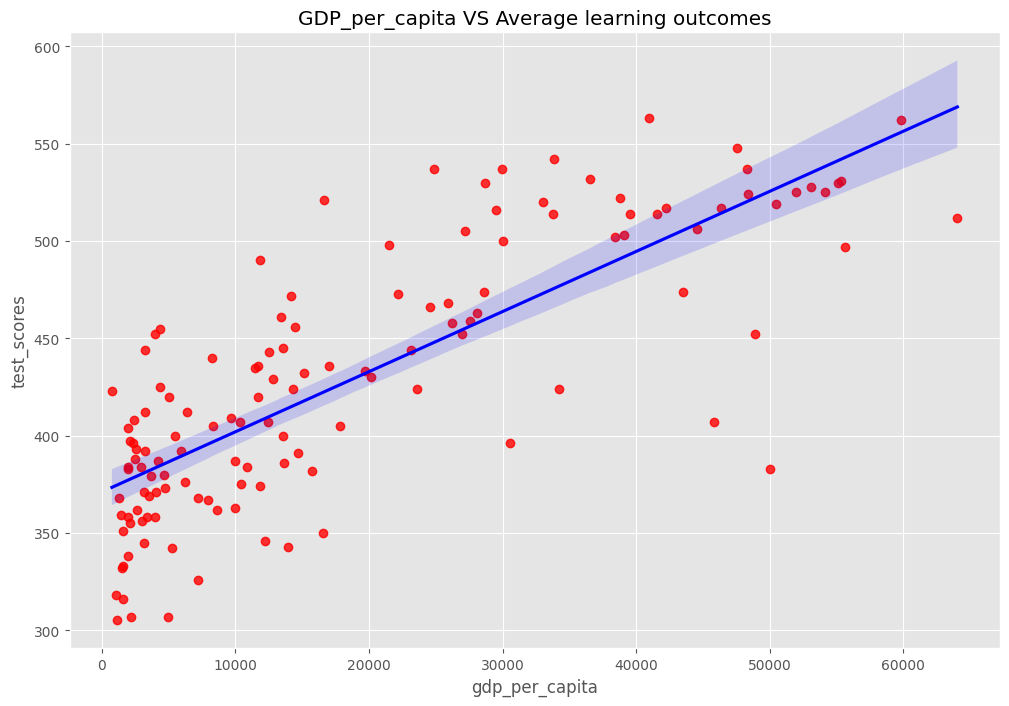

In [ ]:
sns.regplot(x="gdp_per_capita", y="test_scores", data=df_learning_outcome, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('GDP_per_capita VS Average learning outcomes')

Text(0.5, 1.0, 'GDP_per_capita VS Average learning outcomes')

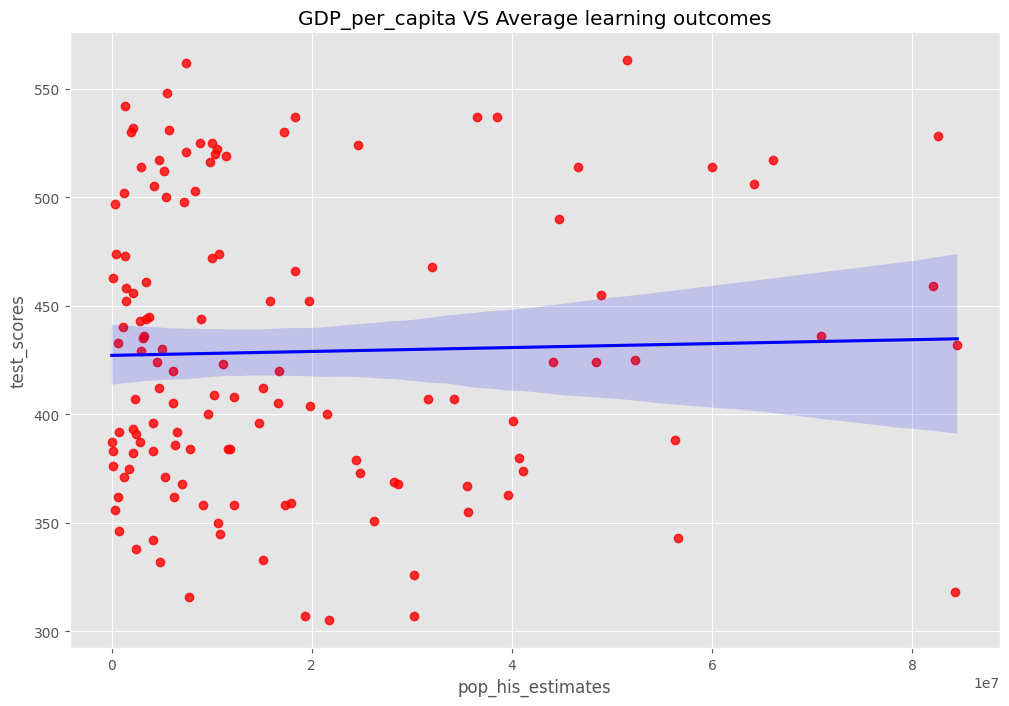

In [ ]:
sns.regplot(x="pop_his_estimates", y="test_scores", data=df_learning_outcome, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('GDP_per_capita VS Average learning outcomes')

#Visualizing the data

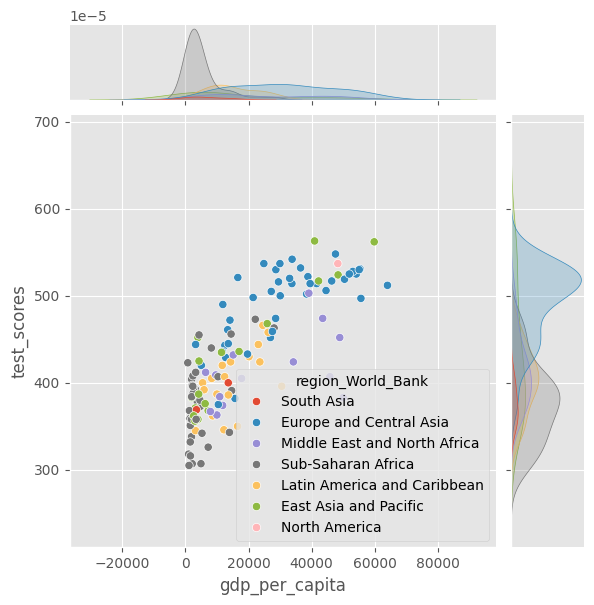

In [ ]:
sns.jointplot(data=df_learning_outcome, x="gdp_per_capita", y="test_scores", hue="region_World_Bank")

<ipython-input-41-4397d08d4d6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_gdp, x="entity",y='gdp_per_capita',palette='Paired',saturation=0.4)


<Axes: xlabel='entity', ylabel='gdp_per_capita'>

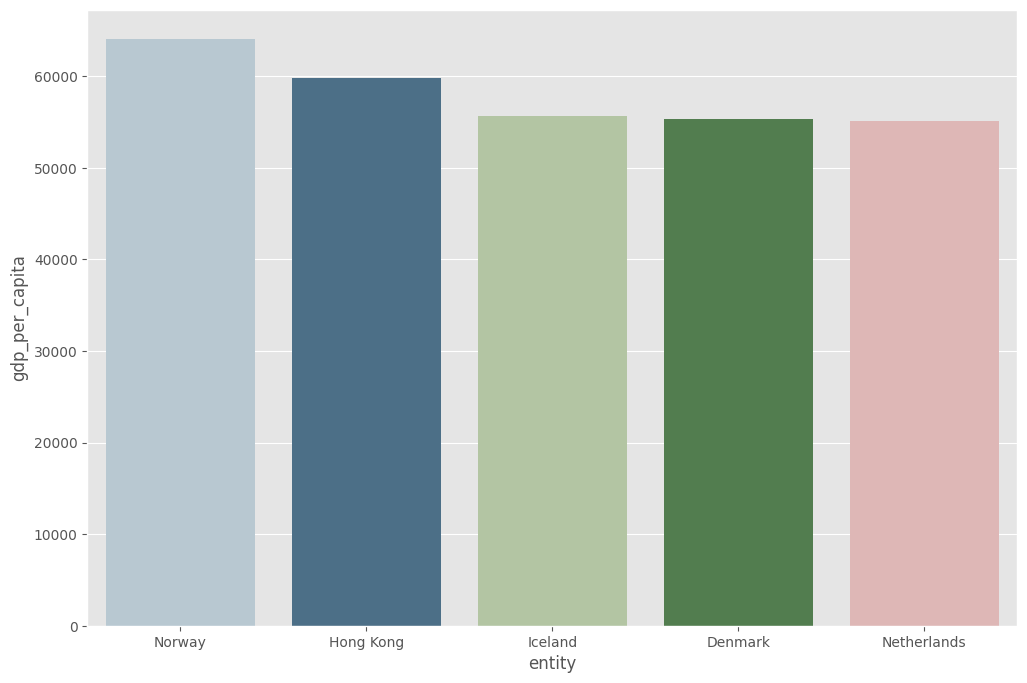

In [ ]:
top_5_gdp = df_learning_outcome.sort_values('gdp_per_capita', ascending=False).head(5)
sns.barplot(data=top_5_gdp, x="entity",y='gdp_per_capita',palette='Paired',saturation=0.4)

<ipython-input-42-a554b95176e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_low_gdp, x="entity",y='gdp_per_capita',palette='Paired',saturation=0.4)


<Axes: xlabel='entity', ylabel='gdp_per_capita'>

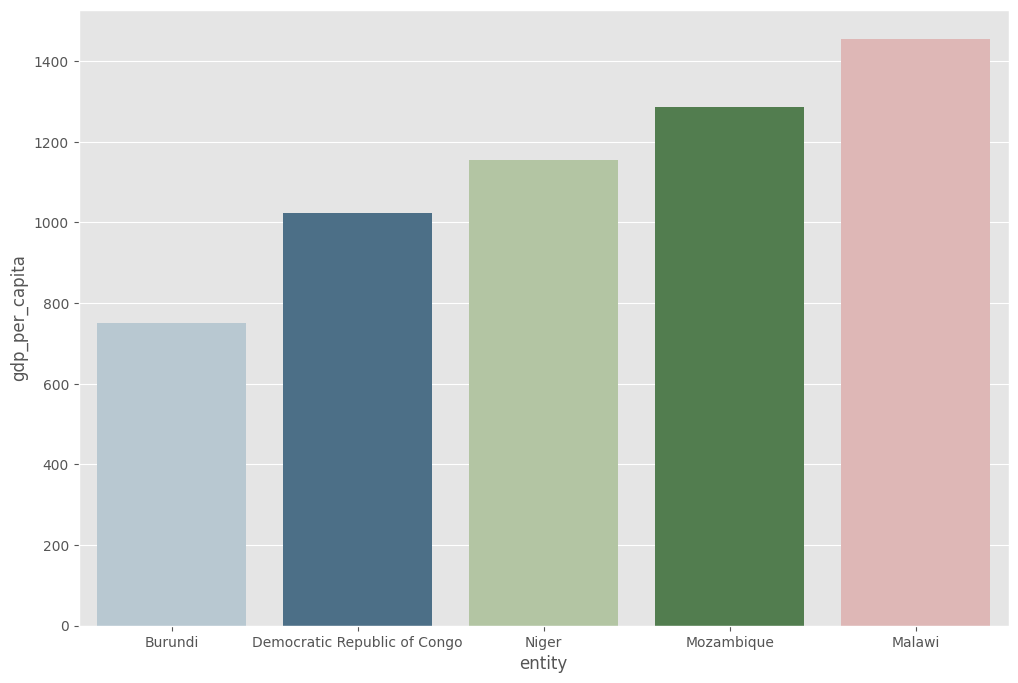

In [ ]:
top_5_low_gdp = df_learning_outcome.sort_values('gdp_per_capita', ascending=True).head(5)
sns.barplot(data=top_5_low_gdp, x="entity",y='gdp_per_capita',palette='Paired',saturation=0.4)